In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./apartment_data.csv", delimiter=",")
df

,area,price
0,229.629630,132.373536
1,384.484484,145.327695
2,775.475475,378.289559
3,284.284284,183.186755
4,273.073073,270.536680
...,...,...
995,393.593594,227.448682
996,641.641642,237.778161
997,756.556557,335.609673
998,286.386386,267.636366


1000
[127.09156381   0.28443383]


Text(0.5, 0, 'MSE')

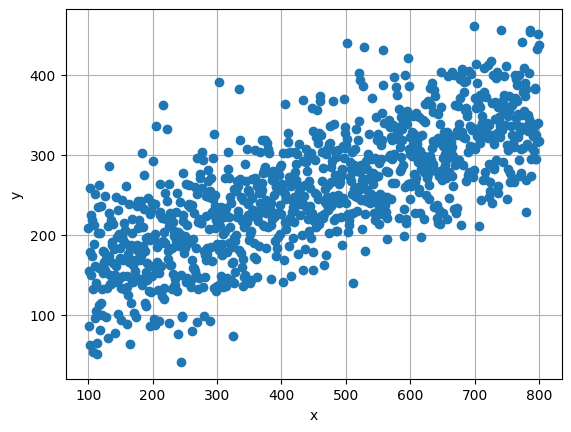

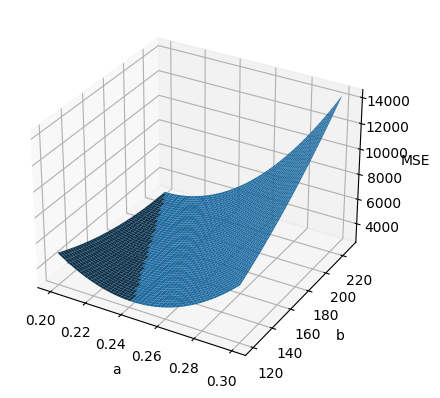

In [39]:
aa = np.linspace(0.2, 0.3)
bb = np.linspace(120, 228)

A, B = np.meshgrid(aa,bb)
MSE = np.zeros(A.shape)

def calculate_mse(a, b, xs, ys):
    preds = a*xs.to_numpy()+b
    return np.mean((preds-ys)**2)

def standardize(col):
    return col
    return (col - col.mean())/col.std()

ys = standardize(df["price"])
xs = standardize(df["area"])

for i, a in enumerate(aa):
    for j, b in enumerate(bb):
        MSE[i,j] = calculate_mse(a,b,xs, ys)
        
fig = plt.figure()
plt.plot(xs, ys, "o")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

fig = plt.figure()

# LR

M = df["area"].to_numpy().reshape(len(df),1)
print(len(df))
ones = np.ones([len(df),1])
M = np.concatenate((ones, M), axis=1)
targets = df["price"]
coefs = np.linalg.solve(M.T.dot(M), M.T.dot(df["price"].to_numpy()))
print(coefs)


# plt.subplot(1,2,1)

# fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(A, B, MSE)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.set_zlabel("MSE")
        
# plt.subplot(1,2,2)

# # fig = plt.figure()
# plt.plot(xs, ys, "o")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.grid()